# Code for 70 datasets

In [1]:
! mkdir "/content/kaggle"
! mkdir "/content/kaggle/datasets"
! cp -r "/content/drive/MyDrive/Dataset 70" "/content/kaggle/datasets"

In [3]:
import tensorflow as tf
import keras_preprocessing
import matplotlib.pyplot as plt
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications import DenseNet201
training_dir = "/content/kaggle/datasets/Dataset 70/train"
validation_dir = "/content/kaggle/datasets/Dataset 70/validation"

In [22]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(300,300),
	class_mode='categorical',
  batch_size=10
)
validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(300,300),
	class_mode='categorical',
  batch_size=10
)

Found 490 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [23]:
pretrained_model = tf.keras.applications.DenseNet201(input_shape=(300,300,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable = False

In [24]:
input_model = pretrained_model.input
layer_tambah = tf.keras.layers.Dense(512, activation='relu')(pretrained_model.output)
output_model = tf.keras.layers.Dense(7, activation='softmax')(layer_tambah)
model = tf.keras.Model(inputs=input_model, outputs=output_model)

In [ ]:
model.summary()

In [25]:
loss_param = "categorical_crossentropy"
EPOCHS = 40
optim = Adam(lr=0.0001)
steps = 49

In [26]:
model.compile(loss = loss_param, optimizer= optim, metrics=['accuracy'])
history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=steps, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/40
49/49 [==============================] - 55s 888ms/step - loss: 1.7895 - accuracy: 0.3245 - val_loss: 1.3755 - val_accuracy: 0.5667
Epoch 2/40
49/49 [==============================] - 41s 829ms/step - loss: 1.0381 - accuracy: 0.6323 - val_loss: 1.6503 - val_accuracy: 0.4333
Epoch 3/40
49/49 [==============================] - 40s 819ms/step - loss: 0.8149 - accuracy: 0.7563 - val_loss: 1.8266 - val_accuracy: 0.4333
Epoch 4/40
49/49 [==============================] - 40s 825ms/step - loss: 0.7155 - accuracy: 0.7575 - val_loss: 1.6770 - val_accuracy: 0.4000
Epoch 5/40
49/49 [==============================] - 40s 821ms/step - loss: 0.6373 - accuracy: 0.8034 - val_loss: 1.9108 - val_accuracy: 0.5000
Epoch 6/40
49/49 [==============================] - 40s 812ms/step - loss: 0.5804 - accuracy: 0.7644 - val_loss: 1.5761 - val_accuracy: 0.5000
Epoch 7/40
49/49 [==============================] - 40s 824ms/step - loss: 0.5150 - accuracy: 0.8166 - val_loss: 2.2022 - val_accuracy: 0.3667

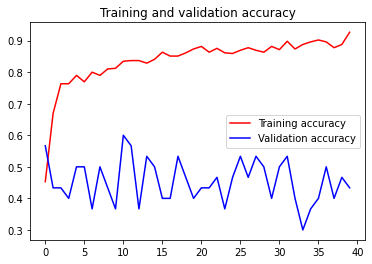

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving spot-_0_2023.jpg to spot-_0_2023.jpg
spot-_0_2023.jpg
[[2.7055162e-15 1.8943723e-26 2.0689992e-17 3.5285818e-35 4.5151708e-14
  1.0000000e+00 1.5431027e-24]]
